In [125]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import pylab as plt




### REPORTE 7
SOFIA DAGER

20201095


#### PARTE 1: LECTURA

La principal pregunta de investigación del artículo presentado es ver si efectivamente el traslado a un barrio de menor pobreza durante la infancia temprana, mejora los resultados y la vida económica a largo plazo de los niños. Además, que los beneficios de este traslado irán disminuyendo mientras la edad del niño aumente. Esto es lo que se trata de responder y de probar a lo largo de todo el artículo.


Este artículo cuenta con muchas fortalezas. Analizan el programa MTO desde muchas variables lo cual ayuda al lector entendeer cómo es que este programa ha impactado en la comunidad. Además, los datos presentados y las comparaciones que se hacen con los proyectos de vivienda pública en Estados Unidos y además, se compara con el grupo "control". Esto ayuda mucho a entender todos los beneficios que este programa ha traido para las familias escogidas. Además, es importante ver como se hacen las comparaciones a través de las diferentes edades. 

Sin embargo, considero que una debilidad podría ser el hecho de que no hay demasiados testimonios. Sería interesante poder leer testimonios de los niños y así poder saber cómo les ha impactado el programa. El artículo nos da una vista más general, pero me gustaría poder saber cómo esto los ha ayudado tanto en su vida personal y laboral. O tal vez si sienten que no les ayudó mucho. Además, hay factores que se deben tomar en cuenta, al hacer una mudanza o traslado, puede ser dificl para los niños, tambien sería importante observar ese factor

El documento explica muy bien las hipótesis y preguntas hechas. Ayuda mucho a entender cómo es que este programa fue implementado, cómo impactó en diferentes factores y además, efectivamente cumple con la hipótesis de que la vida y desarrollo económico de estos niños mejorarán mientras más temprano se muden a una zona de menor pobreza. Sin embargo, me parece importante mencionar que un programa como este solo funciona en un país que tenga una buena educación pública y que el colegio que le toca a cada niño sea por la zona en la que vive. Es decir, en el Perú esto no funcionaría necesariamente porque el hecho de que las familias se muden a una zona menos pobre, no implica que los niños cambiarán de colegio y por lo tanto, no necesariamente tendrán mejores oportunidades. 

Este artículo puede ser comparado con la lectura de la semana pasada sobre la beca HAIL. Ambos son programas que ayudan a personas de bajos recursos y que han obtenido resultados muy positivos. Además, gracias a los dos programas hay más niños que llegan a asistir a universidades y sobre todo, logran graduarse. 

#### PARTE 2: CÓDIGO

#### DATA

In [23]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [63]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


In [65]:
df = pd.DataFrame ({'class_format': ['face_to_face', 'online', 'blended'],
                   })

In [96]:
print(df)
class_format = df

   class_format
0  face_to_face
1        online
2       blended


In [67]:
pd.get_dummies (df)

,class_format_blended,class_format_face_to_face,class_format_online
0,0,1,0
1,0,0,1
2,1,0,0


#### HISTOGRAMA

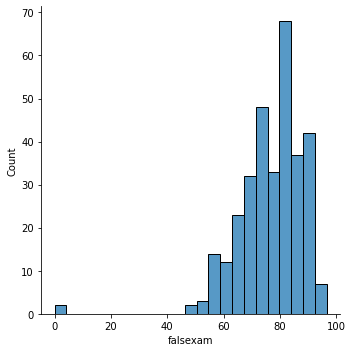

In [86]:
sns.displot(data, x="falsexam")

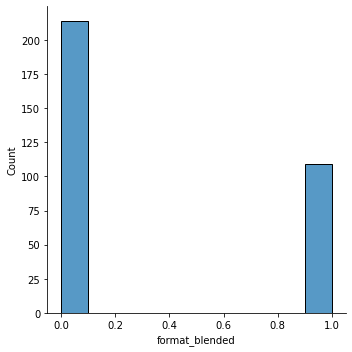

In [80]:
sns.displot(data, x="format_blended")

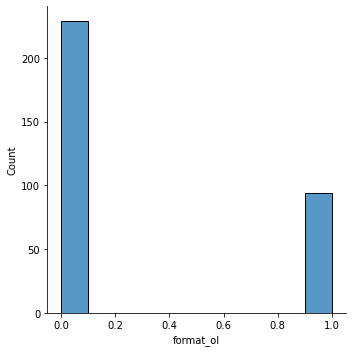

In [98]:
sns.displot(data, x="format_ol")


#### Difference-in-means estimator

In [106]:
DIM = data[['format_ol', 'falsexam']]

In [107]:
DIM

,format_ol,falsexam
0,0,63.29997
1,0,79.96000
2,0,83.37000
3,0,90.01994
4,1,83.30000
...,...,...
318,0,68.36000
319,1,70.05000
320,1,66.69000
321,1,83.29997


In [114]:
DIM.groupby(["format_ol"]).mean()

,falsexam
format_ol,
0,77.855523
1,73.635263


In [120]:
DIM.groupby(["falsexam"]).mean()

,format_ol
falsexam,
0.00000,1.0
48.33998,0.0
50.10000,0.0
51.66000,0.0
51.67900,1.0
...,...
93.39000,1.0
94.99000,0.5
95.01000,0.0


In [121]:
Diferencia_ol_false = 77.855523 - 73.635263

In [123]:
Diferencia_ol_false

4.22026000000001

In [124]:
4.22026000000001/77.855523*100

5.420630210139376

#### Difference-in-means estimator via linear regression